# Cleaning / Snapping points

In [158]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

## Open Graph

In [77]:
path = '../json/GenericDesign_11001/'
t = 0.2 # threshold for the point 

In [78]:
graph = nx.read_graphml(path + 'updated_walls_and_rooms_graph(internal).graphml')

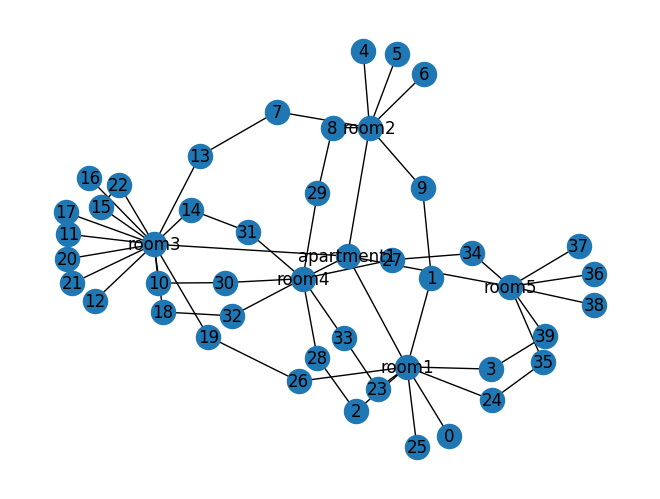

In [79]:
nx.draw(graph, with_labels=True)

In [80]:
sp = nx.get_node_attributes(graph, 'start_point')
ep = nx.get_node_attributes(graph, 'end_point')

In [81]:
sp

{'0': '20.68,10.72,0',
 '1': '20.68,8.72,0',
 '2': '23.81,8.72,0',
 '3': '23.81,10.77,0',
 '4': '20.68,8.72,0',
 '5': '20.68,3.75,0',
 '6': '30.83,3.75,0',
 '7': '30.83,8.62,0',
 '8': '25.6,8.62,0',
 '9': '23.81,8.72,0',
 '10': '25.6,8.62,0',
 '11': '25.6,11.75,0',
 '12': '30.83,11.75,0',
 '13': '30.83,8.62,0',
 '14': '25.6,11.75,0',
 '15': '25.6,14.87,0',
 '16': '30.78,14.87,0',
 '17': '30.83,11.75,0',
 '18': '25.6,14.87,0',
 '19': '25.6,15.9,0',
 '20': '25.6,18,0',
 '21': '30.83,18,0',
 '22': '30.78,14.87,0',
 '23': '25.6,15.9,0',
 '24': '23.86,15.9,0',
 '25': '23.86,17.95,0',
 '26': '25.6,18,0',
 '27': '23.86,15.9,0',
 '28': '23.81,10.77,0',
 '29': '23.81,8.72,0',
 '30': '25.6,8.62,0',
 '31': '25.6,11.75,0',
 '32': '25.6,14.87,0',
 '33': '25.6,15.9,0',
 '34': '23.81,10.77,0',
 '35': '23.86,15.9,0',
 '36': '23.86,17.95,0',
 '37': '23.86,20.67,0',
 '38': '20.73,20.67,0',
 '39': '20.68,10.72,0'}

In [82]:
xs = []
ys = []
for point in sp:
    xs.append(float(sp[point].split(',')[0]))
    ys.append(float(sp[point].split(',')[1]))
    xs.append(float(ep[point].split(',')[0]))
    ys.append(float(ep[point].split(',')[1]))


In [83]:
xs

[20.68,
 20.68,
 20.68,
 23.81,
 23.81,
 23.81,
 23.81,
 20.68,
 20.68,
 20.68,
 20.68,
 30.83,
 30.83,
 30.83,
 30.83,
 25.6,
 25.6,
 23.81,
 23.81,
 20.68,
 25.6,
 25.6,
 25.6,
 30.83,
 30.83,
 30.83,
 30.83,
 25.6,
 25.6,
 25.6,
 25.6,
 30.78,
 30.78,
 30.83,
 30.83,
 25.6,
 25.6,
 25.6,
 25.6,
 25.6,
 25.6,
 30.83,
 30.83,
 30.78,
 30.78,
 25.6,
 25.6,
 23.86,
 23.86,
 23.86,
 23.86,
 25.6,
 25.6,
 25.6,
 23.86,
 23.81,
 23.81,
 23.81,
 23.81,
 25.6,
 25.6,
 25.6,
 25.6,
 25.6,
 25.6,
 25.6,
 25.6,
 23.86,
 23.81,
 23.86,
 23.86,
 23.86,
 23.86,
 23.86,
 23.86,
 20.73,
 20.73,
 20.68,
 20.68,
 23.81]

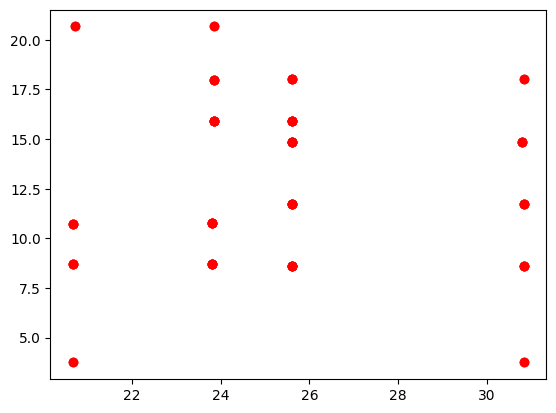

In [84]:
plt.plot(xs, ys, 'ro');

In [85]:
# initialize Xgroups
xGroups = [[xs[0]]]
yGroups = [[ys[0]]]
xs.pop(0)
ys.pop(0)

for x in xs:
    for group in range(len(xGroups)):
        if abs(x-xGroups[group][0]) < t:
            xGroups[group].append(x)
            xs.pop(0)
            break
    else:
        xGroups.append([x])
        xs.pop(0)

for y in ys:
    for group in range(len(yGroups)):
        if abs(y-yGroups[group][0]) < t:
            yGroups[group].append(y)
            ys.pop(0)
            break
    else:
        yGroups.append([y])
        ys.pop(0)

xGroups

[[20.68, 20.68, 20.68, 20.68, 20.68, 20.73, 20.68],
 [23.81,
  23.81,
  23.81,
  23.86,
  23.86,
  23.81,
  23.81,
  23.86,
  23.86,
  23.86,
  23.86,
  23.81],
 [30.83, 30.83, 30.83, 30.83, 30.78, 30.83, 30.83, 30.78],
 [25.6,
  25.6,
  25.6,
  25.6,
  25.6,
  25.6,
  25.6,
  25.6,
  25.6,
  25.6,
  25.6,
  25.6,
  25.6,
  25.6]]

In [86]:
yGroups

[[10.72, 10.77, 10.72, 10.77, 10.72, 10.77],
 [8.72, 8.72, 8.62, 8.62, 8.72, 8.72, 8.62, 8.62, 8.72, 8.62],
 [3.75, 3.75],
 [11.75, 11.75, 11.75, 11.75, 11.75],
 [14.87, 14.87, 14.87, 14.87, 14.87],
 [15.9, 15.9, 15.9, 15.9, 15.9, 15.9],
 [18.0, 18.0, 17.95, 18.0, 17.95],
 [20.67, 20.67]]

In [89]:
xmedian = []
ymedian = []

for group in xGroups:
    xmedian.append(np.round(np.median(group), 3))
for group in yGroups:
    ymedian.append(np.round(np.median(group), 3))

print(f'xmedians: {xmedian}')
print(f'ymedians: {ymedian}')

xmedians: [np.float64(20.68), np.float64(23.835), np.float64(30.83), np.float64(25.6)]
ymedians: [np.float64(10.745), np.float64(8.67), np.float64(3.75), np.float64(11.75), np.float64(14.87), np.float64(15.9), np.float64(18.0), np.float64(20.67)]


In [75]:
record = graph.nodes['0']['start_point']
test = '0,0,0'
graph.nodes['0']['start_point'] = record
graph.nodes['0']['start_point']

'0,0,0'

In [148]:
for node in graph.nodes:
    # is a room or a panel
    try:
        # is a panel test
        r = graph.nodes[node]['panel_type'] 
        # print(f'panel type: {r}')
        # starting point        
        x = float(graph.nodes[node]['start_point'].split(',')[0])
        y = float(graph.nodes[node]['start_point'].split(',')[1])
        xNew = 0
        for xprev in xmedian:
            if abs(x-xprev) < t:
                xNew = xprev
                break
        yNew = 0
        for yprev in ymedian:
            if abs(y-yprev) < t:
                yNew = yprev
                break
        # print(f'original x: {x}, y: {y}')
        # print(f'new x: {xNew}, y: {yNew}')
        # print(f'deltas: {x-xNew}, {y-yNew}')
        newStr = f'{xNew},{yNew},0'
        graph.nodes[node]['start_point'] = newStr
        # ending point
        x = float(graph.nodes[node]['end_point'].split(',')[0])
        y = float(graph.nodes[node]['end_point'].split(',')[1])
        xNew = 0
        for xprev in xmedian:
            if abs(x-xprev) < t:
                xNew = xprev
                break
        yNew = 0
        for yprev in ymedian:
            if abs(y-yprev) < t:
                yNew = yprev
                break
        # print(f'original x: {x}, y: {y}')
        # print(f'new x: {xNew}, y: {yNew}')
        # print(f'deltas: {x-xNew}, {y-yNew}')
        newStr = f'{xNew},{yNew},0'
        graph.nodes[node]['end_point'] = newStr
    except:
        r = graph.nodes[node]['name']
        # print('###############')
        # print(f'room type: {r}')

In [151]:
# testing
# delta must be equal to 0

for node in graph.nodes:
    try:
        r = graph.nodes[node]['panel_type']
        x = float(graph.nodes[node]['start_point'].split(',')[0])
        y = float(graph.nodes[node]['start_point'].split(',')[1])
        xmin = 9999999999
        for xprev in xmedian:
            delta = abs(x-xprev)
            if delta < xmin:
                xmin = delta
        print(f'Delta X = {xmin}')
        yMin = 9999999999
        for yprev in ymedian:
            delta = abs(y-yprev)
            if  delta < yMin:
                yMin = delta
        print(f'Delta Y = {yMin}')
    except:
        r = graph.nodes[node]['name']

Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta Y = 0.0
Delta X = 0.0
Delta 

In [159]:
### Save the graph
nx.write_graphml(graph, path + 'snapped_walls_and_rooms_graph(internal).graphml')
exportJson = nx.node_link_data(graph)
json.dump(exportJson, open(path + 'snapped_walls_and_rooms_graph(internal).json', 'w'))

In [167]:
# Reading an exported graph
newg = nx.read_graphml(path + 'snapped_walls_and_rooms_graph(internal).graphml')
newg.nodes['0']

{'panel_type': 'WAL_21 WAL_33 ',
 'start_point': '20.68,10.745,0',
 'end_point': '20.68,8.67,0',
 'height': 3,
 'thickness': 0.2,
 'room': 'bathroom',
 'apartment': 'Apartment 1'}

In [172]:
newg.nodes

NodeView(('0', 'room1', 'apartment1', '1', '2', '3', '4', 'room2', '5', '6', '7', '8', '9', '10', 'room3', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', 'room4', '28', '29', '30', '31', '32', '33', '34', 'room5', '35', '36', '37', '38', '39'))

In [173]:
newg.edges

EdgeView([('0', 'room1'), ('room1', '1'), ('room1', '2'), ('room1', '3'), ('room1', '23'), ('room1', '24'), ('room1', '25'), ('room1', '26'), ('room1', 'apartment1'), ('apartment1', 'room3'), ('apartment1', 'room2'), ('apartment1', 'room4'), ('apartment1', 'room5'), ('1', '9'), ('2', '28'), ('3', '39'), ('4', 'room2'), ('room2', '5'), ('room2', '6'), ('room2', '7'), ('room2', '8'), ('room2', '9'), ('7', '13'), ('8', '29'), ('10', 'room3'), ('10', '30'), ('room3', '11'), ('room3', '12'), ('room3', '13'), ('room3', '14'), ('room3', '15'), ('room3', '16'), ('room3', '17'), ('room3', '18'), ('room3', '19'), ('room3', '20'), ('room3', '21'), ('room3', '22'), ('11', '17'), ('14', '31'), ('15', '22'), ('18', '32'), ('19', '26'), ('23', '33'), ('24', '35'), ('27', 'room4'), ('27', '34'), ('room4', '28'), ('room4', '29'), ('room4', '30'), ('room4', '31'), ('room4', '32'), ('room4', '33'), ('34', 'room5'), ('room5', '35'), ('room5', '36'), ('room5', '37'), ('room5', '38'), ('room5', '39')])

# All in one function

In [160]:
def snapGraph(path:str, file:str, t:float):
    # 1 laod the graph
    graph = nx.read_graphml(path + file + '.graphml')
    # 2 get the start and end points
    sp = nx.get_node_attributes(graph, 'start_point')
    ep = nx.get_node_attributes(graph, 'end_point')
    # 3 get the x and y coordinates
    xs = []
    ys = []
    for point in sp:
        xs.append(float(sp[point].split(',')[0]))
        ys.append(float(sp[point].split(',')[1]))
        xs.append(float(ep[point].split(',')[0]))
        ys.append(float(ep[point].split(',')[1]))
    # 4 initialize Xgroups
    xGroups = [[xs[0]]]
    yGroups = [[ys[0]]]
    xs.pop(0)
    ys.pop(0)
    # 5 group the x coordinates
    for x in xs:
        for group in range(len(xGroups)):
            if abs(x-xGroups[group][0]) < t:
                xGroups[group].append(x)
                xs.pop(0)
                break
        else:
            xGroups.append([x])
            xs.pop(0)
    # 6 group the y coordinates
    for y in ys:
        for group in range(len(yGroups)):
            if abs(y-yGroups[group][0]) < t:
                yGroups[group].append(y)
                ys.pop(0)
                break
        else:
            yGroups.append([y])
            ys.pop(0)
    # 7 get the median values
    xmedian = []
    ymedian = []
    for group in xGroups:
        xmedian.append(np.round(np.median(group), 3))
    for group in yGroups:
        ymedian.append(np.round(np.median(group), 3))
    # 8 snap the coordinates
    for node in graph.nodes:
        try:
            r = graph.nodes[node]['panel_type'] 
            x = float(graph.nodes[node]['start_point'].split(',')[0])
            y = float(graph.nodes[node]['start_point'].split(',')[1])
            xNew = 0
            for xprev in xmedian:
                if abs(x-xprev) < t:
                    xNew = xprev
                    break
            yNew = 0
            for yprev in ymedian:
                if abs(y-yprev) < t:
                    yNew = yprev
                    break
            newStr = f'{xNew},{yNew},0'
            graph.nodes[node]['start_point'] = newStr
            x = float(graph.nodes[node]['end_point'].split(',')[0])
            y = float(graph.nodes[node]['end_point'].split(',')[1])
            xNew = 0
            for xprev in xmedian:
                if abs(x-xprev) < t:
                    xNew = xprev
                    break
            yNew = 0
            for yprev in ymedian:
                if abs(y-yprev) < t:
                    yNew = yprev
                    break
            newStr = f'{xNew},{yNew},0'
            graph.nodes[node]['end_point'] = newStr
        except:
            r = graph.nodes[node]['name']
    # 9 save the graph
    nx.write_graphml(graph, path + file + '_snapped.graphml')
    exportJson = nx.node_link_data(graph)
    json.dump(exportJson, open(path + file + '_snapped.json', 'w'))
    return graph


# Batch Exporting snapped graphs

In [163]:
snapGraph('../json/GenericDesign_12001/', 'updated_walls_and_rooms_graph(internal)', t)
snapGraph('../json/GenericDesign_12005/', 'updated_walls_and_rooms_graph(internal)', t)
snapGraph('../json/GenericDesign_12009/', 'updated_walls_and_rooms_graph(internal)', t)
snapGraph('../json/GenericDesign_14007/', 'updated_walls_and_rooms_graph(internal)', t)
snapGraph('../json/GenericDesign_14012/', 'updated_walls_and_rooms_graph(internal)', t)
snapGraph('../json/GenericDesign_18003/', 'updated_walls_and_rooms_graph(internal)', t)
snapGraph('../json/GenericDesign_21004/', 'updated_walls_and_rooms_graph(internal)', t)

snapGraph('../json/ReferenceDesign_01/', 'updated_walls_and_rooms_graph(internal)', t)
snapGraph('../json/ReferenceDesign_02/', 'updated_walls_and_rooms_graph(internal)', t)

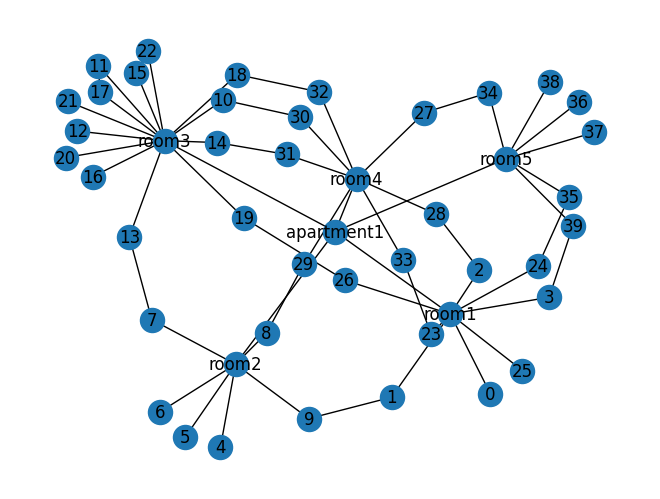

In [166]:
nx.draw(graph, with_labels=True)